<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Homework_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras import layers
from keras import models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#class names
class_names = ['майка', 'штані', 'світер', 'плаття', 'толстовка', 'сандалі', 'сорочка', 'кросівки', 'сумка', 'жіночі краги']

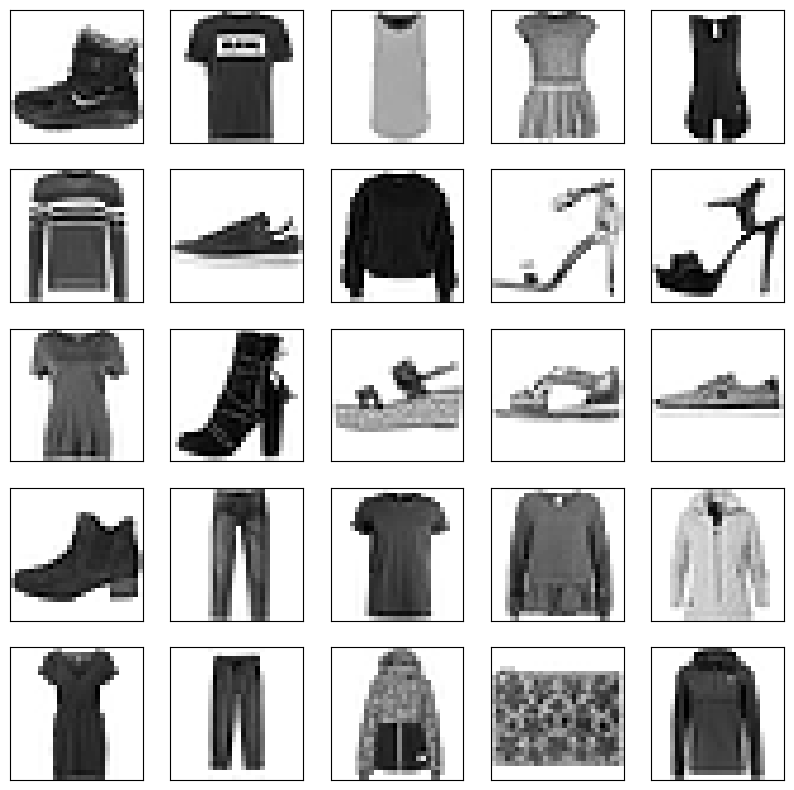

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  #plt.xlabel(class_names[y_train[i]])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(62,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(62,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 62)        17918     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 62)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 62)          34658     
                                                                 
 flatten (Flatten)           (None, 558)               0

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(x_train, y_train, epochs=8, batch_size=64)

Epoch 1/8
938/938 [==============================] - 59s 62ms/step - loss: 0.2139 - accuracy: 0.9211
Epoch 2/8
938/938 [==============================] - 61s 65ms/step - loss: 0.1958 - accuracy: 0.9280
Epoch 3/8
938/938 [==============================] - 59s 63ms/step - loss: 0.1808 - accuracy: 0.9339
Epoch 4/8
938/938 [==============================] - 57s 61ms/step - loss: 0.1688 - accuracy: 0.9373
Epoch 5/8
938/938 [==============================] - 59s 63ms/step - loss: 0.1558 - accuracy: 0.9428
Epoch 6/8
938/938 [==============================] - 57s 61ms/step - loss: 0.1445 - accuracy: 0.9455
Epoch 7/8
938/938 [==============================] - 58s 62ms/step - loss: 0.1350 - accuracy: 0.9495
Epoch 8/8
938/938 [==============================] - 58s 61ms/step - loss: 0.1260 - accuracy: 0.9530


In [ ]:
#тестування
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), y_pred_labels)
print(report)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.91      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.90      0.82      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.68      0.72      1000
           7       0.93      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Поточна згорткова модель

    accuracy                           0.91     10000


Попередня щільна модель

    accuracy                           0.89     10000

Висновок - алгоритм згорткової нейронної мережі дає кращі результати в порівнянні з шільною мережею, яка обробляє зображення повністю, а також більш пристосована до роботи з великими зображеннями

**2 Частина**




In [41]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

Завдання 2 частково копіює попередній код у зв'язку з тим що виконувалось окремо від попереднього

In [42]:
# Загрузка данных Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Преобразование размерности изображений и приведение значений пикселей к диапазону [0, 1]
x_train = tf.image.resize(tf.expand_dims(x_train, axis=-1), (32, 32)) / 255.0
x_test = tf.image.resize(tf.expand_dims(x_test, axis=-1), (32, 32)) / 255.0

# Преобразование оттенков серого в трехканальный формат RGB
x_train = tf.image.grayscale_to_rgb(x_train)
x_test = tf.image.grayscale_to_rgb(x_test)

# Загрузка предварительно обученной модели VGG16 без верхней части
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживаем веса предварительно обученной модели
base_model.trainable = False

# Добавляем свой классификатор над базовой моделью
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Создание модели для обучения
model = Model(inputs=base_model.input, outputs=predictions)

# Компиляция модели
model.compile(optimizer=SGD(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Объединение x_train и y_train в один датасет с помощью метода tf.data.Dataset.from_tensor_slices
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Определение модуля Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Обучение модели
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
938/938 [==============================] - 791s 842ms/step - loss: 1.9040 - accuracy: 0.4422 - val_loss: 1.6061 - val_accuracy: 0.5829
Epoch 2/50
938/938 [==============================] - 786s 838ms/step - loss: 1.4197 - accuracy: 0.6362 - val_loss: 1.2763 - val_accuracy: 0.6655
Epoch 3/50
938/938 [==============================] - 787s 838ms/step - loss: 1.1683 - accuracy: 0.6858 - val_loss: 1.0922 - val_accuracy: 0.6913
Epoch 4/50
938/938 [==============================] - 793s 846ms/step - loss: 1.0236 - accuracy: 0.7054 - val_loss: 0.9812 - val_accuracy: 0.7079
Epoch 5/50
938/938 [==============================] - 786s 839ms/step - loss: 0.9321 - accuracy: 0.7197 - val_loss: 0.9087 - val_accuracy: 0.7205
Epoch 6/50
938/938 [==============================] - 752s 802ms/step - loss: 0.8700 - accuracy: 0.7283 - val_loss: 0.8577 - val_accuracy: 0.7288
Epoch 7/50
938/938 [==============================] - 787s 840ms/step - loss: 0.8250 - accuracy: 0.7359 - val_loss: 0.8191 -

KeyboardInterrupt: ignored